In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### All Donations

In [34]:
food_full = pd.read_csv("food_full.csv")
food_full["date"] = pd.to_datetime(food_full["date"])
food_full["size"] = food_full["size"].astype("str")
food_full.loc[(food_full["state"] != "California") & (food_full["state"] != "New York"), "state"] = "underdeveloped"
company_num_donation = food_full.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_size = food_full.groupby("company")["size"].first()
company_type = food_full.groupby("company")["type"].first()
company_state = food_full.groupby("company")["state"].first()
company_full = pd.DataFrame({
                        "size": company_size, "type": company_type,
                      
                        "one_donation": company_one_donation, 
                        "state": company_state
                       })
#company["top_contributor"] = company["num_donation"].apply(lambda x: 1 if x >= 50
#                                                          else 0)
#company.loc[company.index == "Imgur", "popular_weekday"] = "Friday"
#company = company[~(company.index == "Curiodysse")]

In [35]:
pd.get_dummies(company_full).to_csv("company_full.csv", sep = ",")

In [36]:
#company.to_csv("avg_week_donation_raw.csv", sep = ",")

In [37]:
#company_processed.to_csv("avg_week_donation.csv")

### Companies with Recorded Pounds

In [40]:
food.head()

,Unnamed: 0,Id,date,pounds,id,number,street,city,company,state,...,lat,lon,pickup,planned,month,day,year,weekday,size,type
0,351,404,2017-06-21,40.0,40,901,Market Street,San Francisco,DoorDash,California,...,37.783438,-122.407991,20,False,6,21,2017,Wednesday,500.0,food
1,352,405,2017-06-21,3.0,51,500,Arguello Street,Redwood City,GoFundMe,California,...,37.487645,-122.233381,20,False,6,21,2017,Wednesday,500.0,other
2,353,406,2017-06-21,100.0,66,475,Sansome Street,San Francisco,Twitch,California,...,37.794573,-122.401940,20,False,6,21,2017,Wednesday,1000.0,comm
3,354,407,2017-06-21,85.0,72,225,Bush Street,San Francisco,Twitch,California,...,37.790841,-122.401280,20,False,6,21,2017,Wednesday,1000.0,comm
4,355,408,2017-06-21,50.0,64,116,New Montgomery Street,San Francisco,Opendoor,California,...,37.787072,-122.400451,20,False,6,21,2017,Wednesday,1000.0,fin


In [6]:
company

,num_donation,num_weeks,one_donation,popular_month,popular_month_frac,popular_weekday,popular_weekday_frac,size,start_month,state,type,top_contributor
company,,,,,,,,,,,,
32BJ SEIU,1,1,1,9,1.000000,Monday,1.000000,500.0,9,New York,other,0
AT&T Foundry,19,11,0,4,0.473684,Wednesday,0.526316,50.0,3,California,comm,1
Acxiom,4,15,0,4,0.500000,Thursday,0.750000,5000.0,2,New York,bus,0
"Adams & Company Real Estate, LLC",8,18,0,1,0.375000,Tuesday,0.250000,200.0,12,New York,fin,0
"Addepar, Inc.",8,15,0,5,0.375000,Friday,1.000000,500.0,2,New York,fin,0
Aera Technology Inc.,44,49,0,9,0.113636,Friday,0.977273,200.0,6,California,applied,1
Airbnb,5,14,0,11,0.400000,Friday,0.600000,5000.0,10,New York,sale,0
Aramark SF,37,49,0,9,0.135135,Friday,1.000000,10001.0,6,California,food,1
Audentes Therapeutics,7,26,0,4,0.428571,Thursday,0.428571,200.0,11,California,edu-health,0


In [7]:
#for all companies that made a donation 
food = pd.read_csv("food_cleaned.csv")
food["date"] = pd.to_datetime(food["date"])
food["size"] = food["size"].astype("str")
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "underdeveloped"
company_weeks = food.groupby("company")["date"].agg(lambda x: int((max(x) - min(x))/np.timedelta64(1, "W")))+ 1
company_tot_donation = food.groupby("company")["pounds"].agg(np.sum)
company_num_donation = food.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_pound_per_week = company_tot_donation/company_weeks
company_avg_donation = company_tot_donation/company_num_donation
#company_max_donation = food.groupby("company")["pounds"].agg(np.max)
company_min_donation = food.groupby("company")["pounds"].agg(np.min)
#company_med_donation = food.groupby("company")["pounds"].agg(np.median)
company_size = food.groupby("company")["size"].first()
company_type = food.groupby("company")["type"].first()
company_state = food.groupby("company")["state"].first()
company_most_donation_weekday = food.groupby("company")["weekday"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_weekday_frac = food.groupby("company")["weekday"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
#company_max_weekday = food.loc[food.reset_index().groupby("company")["pounds"].idxmax()]["weekday"]
#company_max_weekday.index = company_weeks.index
#company_first_donation = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"]
#company_first_donation.index = company_weeks.index
company_most_donation_month = food.groupby("company")["month"].agg(lambda x: np.argmax(x.value_counts())).astype("str")
company_most_donation_month_frac = food.groupby("company")["month"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_start_month = pd.to_datetime(food.groupby("company")["date"].agg(np.min)).dt.month.astype("str")
company = pd.DataFrame({"tot_donation": company_tot_donation, 
                       "num_donation": company_num_donation, 
                        "num_weeks": company_weeks, 
                       "avg_donation": company_avg_donation, 
                        "week_donation": company_pound_per_week,
                      # "max_donation": company_max_donation, 
                       # "med_donation": company_med_donation,
                        "min_donation": company_min_donation,
                        "size": company_size, "type": company_type,
                       "popular_weekday": company_most_donation_weekday,
                        "popular_month": company_most_donation_month,
                       "popular_weekday_frac": company_most_donation_weekday_frac,
                        "popular_month_frac": company_most_donation_month_frac,
                       #"max_pound_weekday": company_max_weekday, 
                        "start_month": company_start_month,
                        "one_donation": company_one_donation, "state": company_state
                       })
company["top_contributor"] = company["num_donation"].apply(lambda x: 1 if x >= 10
                                                          else 0)
company = company[~(company.index == "Curiodysse")]

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [13]:
pd.get_dummies(company)

,num_donation,num_weeks,one_donation,popular_month_frac,popular_weekday_frac,top_contributor,popular_month_1,popular_month_10,popular_month_11,popular_month_12,...,type_applied,type_bus,type_comm,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web
company,,,,,,,,,,,,,,,,,,,,,
32BJ SEIU,1,1,1,1.000000,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
AT&T Foundry,19,11,0,0.473684,0.526316,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Acxiom,4,15,0,0.500000,0.750000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"Adams & Company Real Estate, LLC",8,18,0,0.375000,0.250000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"Addepar, Inc.",8,15,0,0.375000,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Aera Technology Inc.,44,49,0,0.113636,0.977273,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Airbnb,5,14,0,0.400000,0.600000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Aramark SF,37,49,0,0.135135,1.000000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Audentes Therapeutics,7,26,0,0.428571,0.428571,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
company["one_donation"].value_counts()

0    130
1     62
Name: one_donation, dtype: int64

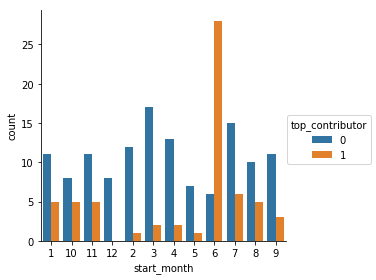

In [9]:
sns.factorplot(x = "start_month", hue = "top_contributor", data = company, kind = "count")

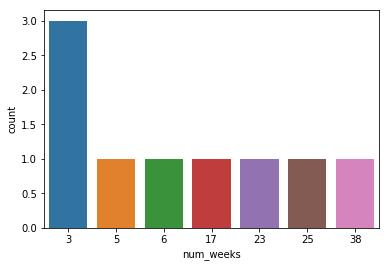

In [10]:
sns.countplot(company[(company["num_donation"] == 3)]["num_weeks"])